In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
import pandas as pd

In [3]:
datasets = ('3A4', 'CB1', 'DPP4', 'HIVINT', 'HIVPROT', 'LOGD', 'METAB', 'NK1', 'OX1', 'OX2', 'PGP', 'PPB', 'RAT_F', 'TDI', 'THROMBIN')

In [4]:
def Rsquared(x, y):
    avx = np.average(x)
    avy = np.average(y)
    num = np.sum( (x-avx)*(y-avy) )**2
    denom = np.sum( (x-avx)**2 ) * np.sum( (y-avy)**2 )
    return num/denom

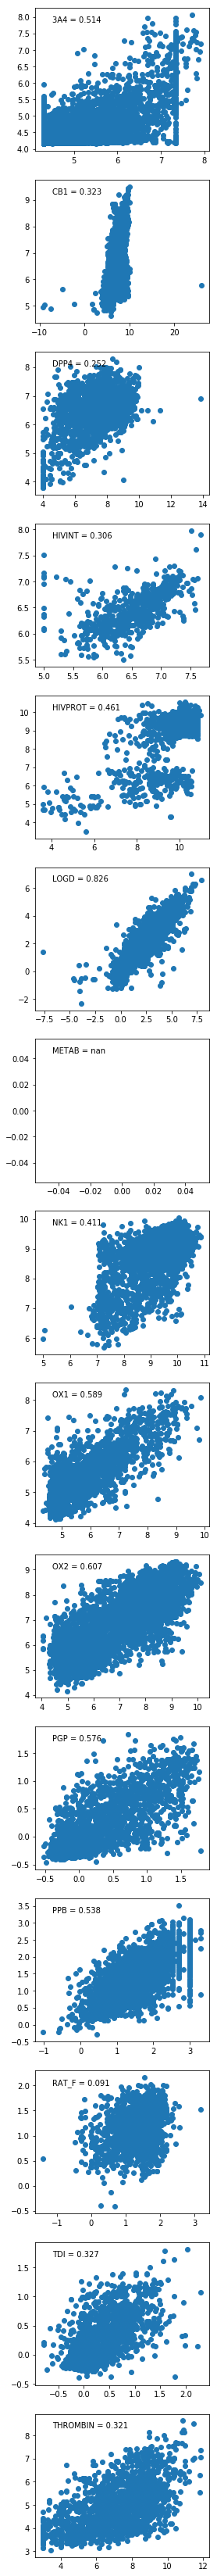

In [5]:
n = len(datasets)
fig, ax = plt.subplots(n, figsize=(4,60))

for i,dataset in enumerate(datasets):
    test = pd.read_csv('../merck.data/csv/%s_test_disguised.csv' % dataset, usecols=['Act'])
    pred = pd.read_csv('csv/%s_prediction.csv' % dataset)
    
    test_y = test.filter(['Act']).values.ravel()
    pred_y = pred.filter(['Act']).values.ravel()
    
    ax[i].scatter(test_y, pred_y)
    ax[i].annotate('%s = %.3f' % (dataset, Rsquared(test_y, pred_y)), 
                   xy=(0.1, 0.9), xycoords="axes fraction")

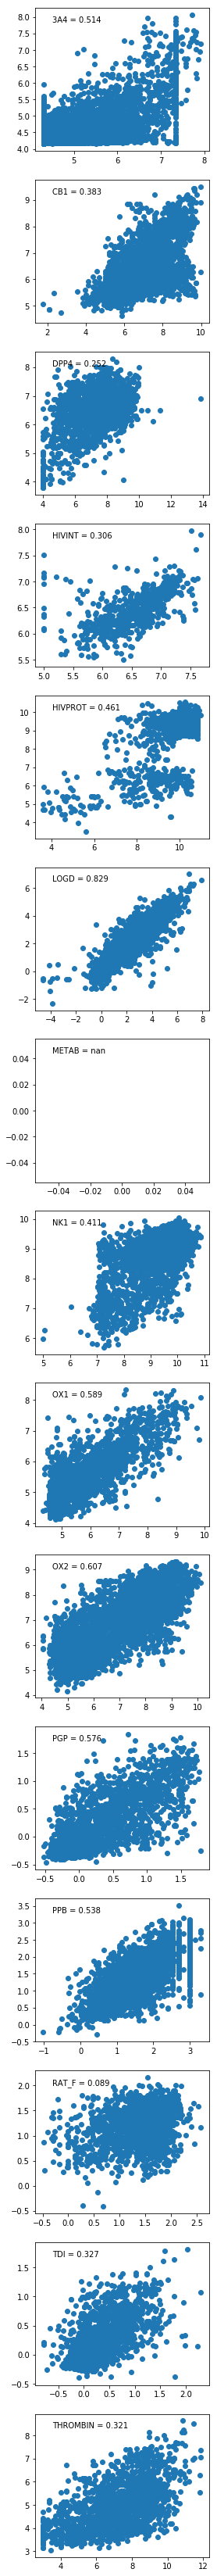

In [6]:
n = len(datasets)
fig, ax = plt.subplots(n, figsize=(4,60))
ranges = {
    'CB1': (0, 10),
    'RAT_F': (-1, 3),
    'LOGD': (-5, 10),
}

for i,dataset in enumerate(datasets):
    test = pd.read_csv('../merck.data/csv/%s_test_disguised.csv' % dataset, usecols=['Act'])
    pred = pd.read_csv('csv/%s_prediction.csv' % dataset)
    
    test_y = test.filter(['Act']).values.ravel()
    pred_y = pred.filter(['Act']).values.ravel()
    
    if dataset in ranges:
        idx = np.logical_and(test_y > ranges[dataset][0], test_y < ranges[dataset][1])
        ax[i].scatter(test_y[idx], pred_y[idx])
        r2 = Rsquared(test_y[idx], pred_y[idx])
    else:
        ax[i].scatter(test_y, pred_y)
        r2 = Rsquared(test_y, pred_y)
    ax[i].annotate('%s = %.3f' % (dataset, r2), xy=(0.1, 0.9), xycoords="axes fraction")

In [7]:
ranges = {
    'CB1': (0, 10),
    'RAT_F': (-1, 3),
    'LOGD': (-5, 10),
}

for i,dataset in enumerate(datasets):
    test = pd.read_csv('../merck.data/csv/%s_test_disguised.csv' % dataset, usecols=['Act'])
    pred = pd.read_csv('csv/%s_prediction.csv' % dataset)
    
    test_y = test.filter(['Act']).values.ravel()
    pred_y = pred.filter(['Act']).values.ravel()
    
    if dataset in ranges:
        idx = np.logical_and(test_y > ranges[dataset][0], test_y < ranges[dataset][1])
        ax[i].scatter(test_y[idx], pred_y[idx])
        r2 = Rsquared(test_y[idx], pred_y[idx])
    else:
        ax[i].scatter(test_y, pred_y)
        r2 = Rsquared(test_y, pred_y)
    print("%10s %.3f" % (dataset, r2))

       3A4 0.514
       CB1 0.383
      DPP4 0.252
    HIVINT 0.306
   HIVPROT 0.461
      LOGD 0.829
     METAB nan
       NK1 0.411
       OX1 0.589
       OX2 0.607
       PGP 0.576
       PPB 0.538
     RAT_F 0.089
       TDI 0.327
  THROMBIN 0.321
